## Data Mining
### mnist

Author: Ayana Andrews-Joseph

Use `mnist` data (from [`keras.datasets.mnist`](https://keras.io/api/datasets/mnist/)) to build abuild a digits-recognition model. <br/>
This is a dataset of 60,000 `28X28` grayscale images of the 10 digits, along with a test set of 10,000 images.

### `mnist` DATA NOTES - <br/>
`mnist` Returns: <br/>

Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test).<br/>
`x_train`: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.<br/>

`y_train`: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.<br/>

`x_test`: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.<br/>

`y_test`: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.<br/>

### Import libraries

In [2]:
# data stuff
import numpy as np
import tensorflow as tf

# image data
from tensorflow.keras.datasets import mnist

# plotting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Load Data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# check raw shape
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
# data for the first two images
X_train[:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

#### Data Check - First label and image in training set

In [5]:
# label
y_train[0]

5

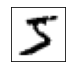

In [6]:
#plot image
plt.figure(figsize=(1, 1))
plt.imshow(X_train[0], cmap='binary')
plt.xticks([])
plt.yticks([]);

Flattening the data - Pixel values range from 0 to 255. `0` means the pixel at that point has no intensity and `255` has the highest intensity.

In [7]:
# Scale the data so that the values are from 0 - 1
X_train = X_train / 255
X_test = X_test / 255

In [8]:
# Flattening the train and test data
X_train_flt = X_train.reshape(len(X_train), 28*28)
X_test_flt = X_test.reshape(len(X_test), 28*28)

X_train_flt.shape, X_test_flt.shape

((60000, 784), (10000, 784))

Good sign.

## Build `Digits` Classification Model

### **`Model 1`** - Try RF model

In [9]:
# define the model object
clf = RandomForestClassifier(random_state=314, max_depth=4, n_estimators=10)

# fit (train) the model
clf.fit(X_train_flt, y_train)

# make predictions on the test data
y_preds = clf.predict(X_test_flt)

print(f'Model accuracy: {accuracy_score(y_preds, y_test):.2%}')

Model accuracy: 77.10%


77.10% accuracy, try to optimize.

### **`Model 2`** - Try with optimizer

In [10]:
# modeling
from sklearn.ensemble import RandomForestClassifier

# grid search
from sklearn.model_selection import RandomizedSearchCV

forest = RandomForestClassifier(random_state=314)


param_grid = {'n_estimators': [100, 200, 300, 550, 700],  
              'max_depth': [3, 6, 7, 10, 'depth'],
              'min_samples_leaf': [0.02, 0.05],
              'bootstrap': [True, False], 
              'max_features':['auto', 'n_features'], 
              'criterion': ['gini', 'entropy'], 
              'verbose': [0, 1, 2, 3]}

forest_gs = RandomizedSearchCV(forest, param_grid, cv=3, verbose=2, n_iter=10,
                               n_jobs=-1, random_state=314)


forest_gs.fit(X_train_flt, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [   nan    nan 0.7989    nan    nan    nan    nan    nan    nan    nan]
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   29.9s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=314),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 6, 7, 10, 'depth'],
                                        'max_features': ['auto', 'n_features'],
                                        'min_samples_leaf': [0.02, 0.05],
                                        'n_estimators': [100, 200, 300, 550,
                                                         700],
                                        'verbose': [0, 1, 2, 3]},
                   random_state=314, verbose=2)

In [11]:
# make predictions on the test data
y_preds = forest_gs.predict(X_test_flt)

print(f'Model accuracy: {accuracy_score(y_preds, y_test):.2%}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Model accuracy: 80.53%


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


80.53% accuracy, try one more time. MLP? Hidden layer?

### **`Model 3`** - MLP with a hidden layer

In [12]:
from tensorflow import random as tf_random
import numpy as np
import random

def init_seeds(s):
    '''
    Initializes random seeds prior to model training 
    to ensure reproducibality of training results.
    '''
    tf_random.set_seed(s)
    np.random.seed(s)
    random.seed(s)

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense


# initialize seeds
init_seeds(314)

# Sequential create a stack of layers
mlp = Sequential(
    [
        Input(shape=(784,)),
        Dense(32, activation='sigmoid'), 
        Dense(10, activation='softmax', name='output_layer')
    ])

# Optimizer
mlp.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Does the training
mlp.fit(X_train_flt, y_train, batch_size=8, epochs=5, shuffle=True, verbose=2)

Epoch 1/5
7500/7500 - 3s - loss: 0.4032 - accuracy: 0.9001
Epoch 2/5
7500/7500 - 2s - loss: 0.2030 - accuracy: 0.9413
Epoch 3/5
7500/7500 - 2s - loss: 0.1625 - accuracy: 0.9537
Epoch 4/5
7500/7500 - 2s - loss: 0.1386 - accuracy: 0.9600
Epoch 5/5
7500/7500 - 2s - loss: 0.1223 - accuracy: 0.9646


In [14]:
mlp.evaluate(X_test_flt, y_test)

313/313 [==============================] - 0s 372us/step - loss: 0.1378 - accuracy: 0.9584


[0.13781093060970306, 0.9584000110626221]

In [15]:
loss, accuracy = mlp.evaluate(X_test_flt, y_test, batch_size=1)

print(f'Loss: {loss:.2%}, Accuracy: {accuracy:.2%}')

10000/10000 [==============================] - 5s 509us/step - loss: 0.1378 - accuracy: 0.9584
Loss: 13.78%, Accuracy: 95.84%


`Winner, winner, chicken dinner!` <br/>
The 'MLP' model performed the best with `batch size` = 8, number of `epochs` = 5, and `optimizer` = adam.

Predict Values

In [16]:
# make predictions on the test data
y_preds = mlp.predict(X_test_flt)
y_preds

array([[5.7356751e-06, 2.4954434e-06, 2.3456475e-04, ..., 9.9901879e-01,
        3.6665409e-05, 3.6600220e-05],
       [5.2723946e-04, 1.0788558e-03, 9.7252673e-01, ..., 1.5752399e-06,
        3.1716048e-04, 3.7164264e-07],
       [1.4650827e-07, 9.9576241e-01, 1.2594976e-03, ..., 2.6922580e-04,
        2.1528527e-03, 7.0888068e-06],
       ...,
       [1.4725336e-07, 8.1743010e-06, 1.2334759e-06, ..., 2.7081743e-03,
        4.2647473e-04, 4.6383720e-03],
       [4.2720781e-06, 3.0578063e-05, 1.6454281e-06, ..., 4.8233886e-07,
        4.5541677e-04, 6.4741289e-07],
       [3.0925195e-04, 1.3448829e-07, 2.2641072e-04, ..., 8.4506485e-07,
        8.7483858e-07, 1.8379133e-06]], dtype=float32)

### Validation : Confusion Matrix

Text(69.0, 0.5, 'Truth')

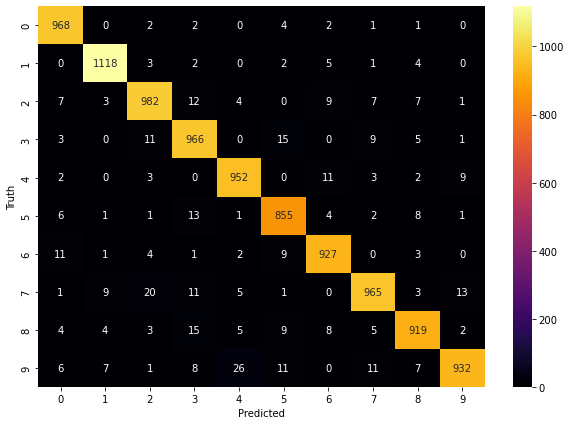

In [17]:
y_predicted_labels = [np.argmax(i) for i in y_preds]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d', cmap='inferno')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### View the predictions

In [21]:
X_train.shape, X_train_flt.shape

((60000, 28, 28), (60000, 784))

#### Create "whole" data sets 

In [22]:
images = np.concatenate([X_test, X_train], axis=0) 

y = np.concatenate([y_test, y_train], axis=0) 

# check raw shape
images.shape, y.shape

((70000, 28, 28), (70000,))

In [23]:
images_flt = np.concatenate([X_test_flt, X_train_flt], axis=0)
images_flt.shape

(70000, 784)

In [24]:
# grab raw model predictions for the entire dataset
y_preds_all = mlp.predict(images_flt)

# view the first ten predictions
y_preds_all.shape, y_preds_all[:5]

((70000, 10),
 array([[5.7356751e-06, 2.4954434e-06, 2.3456475e-04, 6.6231785e-04,
         1.6114888e-07, 2.7137580e-06, 5.8840693e-10, 9.9901879e-01,
         3.6665409e-05, 3.6600220e-05],
        [5.2723946e-04, 1.0788558e-03, 9.7252673e-01, 1.7432012e-02,
         2.0591145e-07, 3.3924177e-03, 4.7234427e-03, 1.5752399e-06,
         3.1716048e-04, 3.7164264e-07],
        [1.4650827e-07, 9.9576241e-01, 1.2594976e-03, 3.8843162e-04,
         1.4350351e-05, 1.0233405e-04, 4.3766373e-05, 2.6922580e-04,
         2.1528527e-03, 7.0888068e-06],
        [9.9911314e-01, 2.6665916e-06, 4.0160310e-05, 5.3255699e-05,
         7.0507031e-06, 1.4533960e-04, 9.3122690e-05, 4.6036317e-04,
         9.9526478e-06, 7.5022181e-05],
        [5.2318537e-05, 5.0369505e-07, 6.0203654e-04, 1.6819042e-05,
         9.9532098e-01, 5.5693432e-05, 4.3967747e-04, 5.1319378e-04,
         1.1130515e-04, 2.8873456e-03]], dtype=float32))

In [25]:
# grab the predicted digit (based on the highest probability) for the entire dataset
preds = [np.argmax(pred) for pred in mlp.predict(images_flt)]

# view the first ten predictions
preds[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

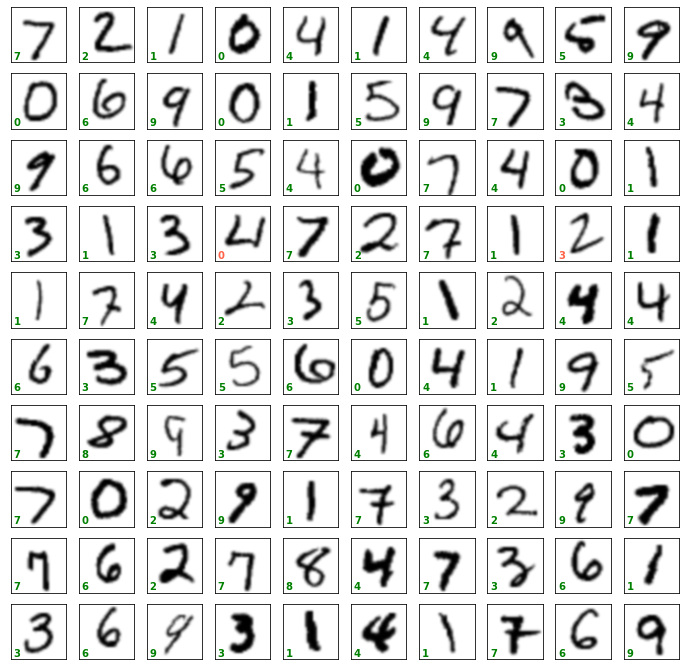

In [26]:
fig, axes = plt.subplots(10, 10, figsize=(12, 12), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='binary', interpolation='bicubic')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    pred = preds[i]
    act = y[i]
    if pred == act:
        ax.text(0.05, 0.05, preds[i], color='green',
                weight='semibold', transform=ax.transAxes)
    else:
        ax.text(0.05, 0.05, preds[i], color='tomato',
                weight='semibold', transform=ax.transAxes)
plt.show();

## Only two out of the first 100 predictions are incorrect!